<a href="https://colab.research.google.com/github/letun1987/Test-task-Tinkoff/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%B0%D0%BD%D0%B4%D0%B8%D0%B4%D0%B0%D1%82%D0%BE%D0%B2_%D0%BD%D0%B0_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ВАЖНО!** Чтобы ваше решение сохранялось и вы могли его нам предоставить в качестве ответа, сохраните себе копию ноутбука (_Файл_ -> _Сохранить копию на Диск_).

Затем разрешите доступ к ноутбуку по ссылке (_Поделиться_ -> _Все у кого есть ссылка_)



Прежде чем перейти к написанию запросов SQL, необходимо отработать параграф "Загрузка и подключение к базе данных"


Сделать это можно нажав на кнопку
 image.png в левом верхнем углу ячейки, вы ее увидите если наведете мышь на соответствующую ячейку, либо воспользоваться комбинацией клавиш `Ctrl+Enter` или `Shift+Enter`

 Так же нужно ознакомиться с параграфом "Инструкция"  

 Теперь вы готовы писать запрос!

## Загрузка и подключение к базе данных

In [ ]:
import gdown

!gdown 'https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0'

Downloading...
From: https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0
To: /content/data.db
100% 16.0M/16.0M [00:00<00:00, 77.8MB/s]


In [ ]:
import pandas as pd
import sqlalchemy
import sqlite3

In [ ]:
sqlalchemy.__version__


'2.0.21'

In [ ]:
%load_ext sql

In [ ]:
#!pip install SQLAlchemy==1.4.46
#%load_ext sql

In [ ]:
%sql sqlite:////content/data.db

%config SqlMagic.displaylimit = 10


## Инструкция

Чтобы писать запросы к базе, нужно перед телом запроса указать команду

`%sql` -- для однострочных запросов, например:

`%sql select count(*) from table_name`

Или же `%%sql` для многострочных запросов:
```
%%sql
select
  count(*)
from
  table_1 as a
  join table_2 as b on
    a.col_1 = b.col_b
```

Также результат запроса можно сохранить в переменную:

`%sql create table qwerty as select * from queue`

А для многострочных запросов, поспользоваться оператором `<<`:
```
%%sql row_count <<
select
  count(*)
from
  table_1 as a
  join table_2 as b on
    a.col_1 = b.col_b
```
Далее можно обращаться к созданной переменной в других ячейках.


---


Ещё имеется возможность преобразовать результат запроса в `pandas.DataFrame`:

```
result = %sql SELECT * FROM character WHERE speechcount > 25
dataframe = result.DataFrame()
```

Либо конвертировать результирующую таблицу в CSV формат, скачать её и использовать, для дальнейшей обработки (анализ, визуализация, построение дашбордов):

```
result = %sql select * from sqlite_master;
result.csv(filename='tables.csv');
```
Файл появится в меню "Файл" слева от рабочей области ноутбука.
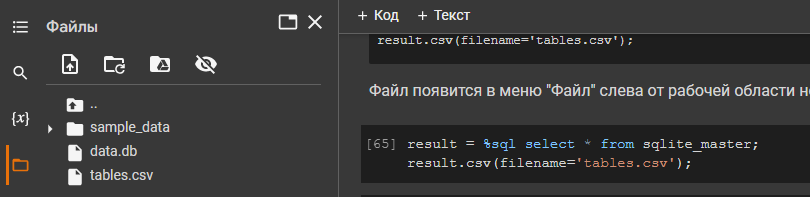

Можно вывести список имеющихся таблиц в базе:

In [ ]:
%sql select tbl_name, "sql" from sqlite_master;

 * sqlite:////content/data.db
Done.


tbl_name,sql
mngmnt,"CREATE TABLE mngmnt ( org_management_rk BIGINT, management_nm TEXT)"
product,"CREATE TABLE product ( hit_rk BIGINT, hid BIGINT, using_flg FLOAT)"
queue,"CREATE TABLE queue ( queue_id BIGINT, queue_desc TEXT)"
result,"CREATE TABLE result ( hit_status_result_id BIGINT, hit_status_result_desc TEXT)"
horoscope,"CREATE TABLE horoscope ( agent_login TEXT, horoscope TEXT)"
group,"CREATE TABLE ""group"" ( org_group_rk BIGINT, org_management_rk BIGINT, group_nm TEXT)"
emp_x_org_gr,"CREATE TABLE emp_x_org_gr ( employee_rk BIGINT, org_group_rk BIGINT)"
task,"CREATE TABLE task ( task_rk BIGINT, task_stage_id FLOAT, source_system_cd TEXT, create_dttm TEXT, finish_dttm TEXT)"
action,"CREATE TABLE action ( hit_rk BIGINT, hit_status_result_id BIGINT)"
call,"CREATE TABLE call ( wo_hit_rk BIGINT, wo_task_rk BIGINT, wo_queue_id BIGINT, agent_login TEXT, wo_employee_rk BIGINT, finish_dttm TEXT, duratoin_sec TEXT)"


# Задание 1
Необходимо с помощью SQL запроса собрать одну общую таблицу из всех данных витрин, которая должна включать в себя все поля этих витрин.
В качестве ответа предоставить ссылку на вашу копию страницы, где можно увидеть написанный запрос и собранную таблицу. Ссылку вставьте в Word файл "Техническое задание" в соответствующее поле.


_(одна из таблиц называется `group`, её имя конфликтует с зарезервированными ключевым словом SQL, поэтому его нужно будет заключить в двойные кавычки `""`)_


## Решение

In [ ]:
%%sql
select *
from call c
left join horoscope h on c.agent_login = h.agent_login
left join emp_x_org_gr emp on emp.employee_rk = c.wo_employee_rk
left join "group" g on g.org_group_rk = emp.org_group_rk
left join mngmnt m on m.org_management_rk = g.org_management_rk
left join queue q on q.queue_id = c.wo_queue_id
left join "action" a on a.hit_rk = c.wo_hit_rk
left join result r on r.hit_status_result_id = a.hit_status_result_id
left join product p on p.hit_rk = c.wo_hit_rk
left join task t on t.task_rk = c.wo_task_rk
order by 1


 * sqlite:////content/data.db
Done.


wo_hit_rk,wo_task_rk,wo_queue_id,agent_login,wo_employee_rk,finish_dttm,duratoin_sec,agent_login_1,horoscope,employee_rk,org_group_rk,org_group_rk_1,org_management_rk,group_nm,org_management_rk_1,management_nm,queue_id,queue_desc,hit_rk,hit_status_result_id,hit_status_result_id_1,hit_status_result_desc,hit_rk_1,hid,using_flg,task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm_1
954,92659270,14354,4393avva,15751111,2022-08-10 10:25:30,0,4393avva,Весы,15751111,3240,3240,1621,Группа 36,1621,Управление КЦ Чизан,14354,Очередь 58,954,5,5,Недозвон,954,4,None,92659270,1.0,GI,2022-07-31 02:06:30,2022-08-29 15:19:29
2264,91939606,1381,povaaxay,21121012,2022-08-10 11:02:13,"106,66",povaaxay,Дева,21121012,2108,2108,691,Группа 21,691,Управление КЦ Кирим,1381,Очередь 65,2264,2,2,"Дозвон, Перезвонить",2264,1,None,91939606,1.0,GI,2022-07-30 21:18:32,2022-08-18 13:37:54
7007,1878214,8159,rovazhag,21211072,2022-08-10 17:48:17,"20,51",rovazhag,Дева,21211072,252,252,401,Группа 13,401,Управление КЦ Дирис,8159,Очередь 22,7007,1,1,"Дозвон, Отказ",7007,2,None,1878214,None,CM,2022-08-10 05:08:43,2022-08-10 17:48:17
7290,2352617,7508,novanzad,79418479,2022-08-10 17:19:37,"50,5",novanzad,Дева,79418479,2558,2558,1726,Группа 12,1726,Управление КЦ Варис,7508,Очередь 66,7290,1,1,"Дозвон, Отказ",7290,2,None,2352617,1.0,GI,2022-08-10 17:18:44,2022-08-10 17:19:40
11190,91091193,14354,6349asch,96121059,2022-08-10 15:54:27,"11,63",6349asch,Водолей,96121059,2430,2430,1699,Группа 26,1699,Управление КЦ Тазан,14354,Очередь 58,11190,1,1,"Дозвон, Отказ",11190,4,None,91091193,1.0,GI,2022-07-29 03:32:52,2022-08-10 15:54:28
11609,1260253,14110,1598nala,61381076,2022-08-10 09:24:26,0,1598nala,Дева,61381076,2351,2351,1636,Группа 1,1636,Управление КЦ Пирс,14110,Очередь 28,11609,5,5,Недозвон,11609,4,None,1260253,None,CM,2022-08-09 05:02:30,2022-08-10 09:24:26
12611,64164155,14790,hinaggda,14719114,2022-08-10 14:18:16,0,hinaggda,Дева,14719114,627,627,378,Группа 38,378,Управление КЦ Керс,14790,Очередь 23,12611,5,5,Недозвон,12611,4,None,64164155,23.0,FW,2022-06-28 10:44:48,2022-08-10 14:18:16
14518,1807250,14755,0365ayup,72581017,2022-08-10 11:42:21,"173,88",0365ayup,Близнецы,72581017,719,719,443,Группа 28,443,Управление КЦ Кас,14755,Очередь 151,14518,2,2,"Дозвон, Перезвонить",14518,4,None,1807250,1.0,GI,2022-08-10 00:33:50,2022-08-17 14:44:20
16197,93282900,7508,9830avmo,17201121,2022-08-10 11:39:11,"71,41",9830avmo,Дева,17201121,2108,2108,691,Группа 21,691,Управление КЦ Кирим,7508,Очередь 66,16197,2,2,"Дозвон, Перезвонить",16197,2,None,93282900,1.0,GI,2022-08-01 14:57:10,2022-08-15 16:05:10
16680,1211265,13044,kovaorbe,25451022,2022-08-10 10:00:06,0,kovaorbe,Овен,25451022,252,252,401,Группа 13,401,Управление КЦ Дирис,13044,Очередь 111,16680,5,5,Недозвон,16680,4,None,1211265,23.0,FW,2022-08-09 04:03:14,2022-08-16 11:25:34


# Задание 2
Необходимо посчитать следующие значения:

* Общее количество звонков со статусом «Дозвон, Успешно»;
* Продажная конверсия, по формуле:

  $$ Конверсия = \frac{N_{Дозвон, Успешно}}{N_{Дозвон, Успешно} + N_{Дозвон, Отказ}}$$
* Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Ответы необходимо вписать в соответствующую таблицу в фаиле "Техническое задание"


## Решение

In [ ]:
# Общее количество звонков со статусом «Дозвон, Успешно». Решение через CTE
%%sql
with cte_count as (select *
  from call c
  left join "action" a on a.hit_rk = c.wo_hit_rk
  left join result r on r.hit_status_result_id = a.hit_status_result_id
  where r.hit_status_result_desc = 'Дозвон, Успешно')
 select count(*) as quantity_of_calls
 from cte_count

 * sqlite:////content/data.db
Done.


quantity_of_calls
3310


In [ ]:
# Общее количество звонков со статусом «Дозвон, Успешно». Решение через подзапрос
%%sql
select count(*) quantity_of_calls
from(
  select *
  from call c
  left join "action" a on a.hit_rk = c.wo_hit_rk
  left join result r on r.hit_status_result_id = a.hit_status_result_id
  where r.hit_status_result_desc = 'Дозвон, Успешно') t


 * sqlite:////content/data.db
Done.


quantity_of_calls
3310


In [ ]:
# Расчет продажной конверсии
%%sql
select cast(t.Дозвон_Успешно as float)/cast(t.Дозвон_Отказ_плюс_Успешно as float)*100 as Конверсия
from (
  select count(c.wo_hit_rk) as 'Дозвон_Отказ_плюс_Успешно',
         count(c.wo_hit_rk) filter (where r.hit_status_result_desc = 'Дозвон, Успешно') as 'Дозвон_Успешно'
  from call c
  left join "action" a on a.hit_rk = c.wo_hit_rk
  left join result r on r.hit_status_result_id = a.hit_status_result_id
  where r.hit_status_result_desc = 'Дозвон, Успешно' or r.hit_status_result_desc = 'Дозвон, Отказ')t

 * sqlite:////content/data.db
Done.


Конверсия
15.205108181358812


In [ ]:
# Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»
%%sql
select round(avg(duratoin_sec), 2)
from call c
left join "action" a on a.hit_rk = c.wo_hit_rk
inner join result r on r.hit_status_result_id = a.hit_status_result_id and r.hit_status_result_desc = 'Дозвон, Успешно'


 * sqlite:////content/data.db
Done.


"round(avg(duratoin_sec), 2)"
109.69


In [ ]:
# Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»
%%sql
select round(avg(c.duratoin_sec),2)
from call c
left join "action" a on a.hit_rk = c.wo_hit_rk
left join result r on r.hit_status_result_id = a.hit_status_result_id
where r.hit_status_result_desc = 'Дозвон, Успешно'


 * sqlite:////content/data.db
Done.


"round(avg(c.duratoin_sec),2)"
109.69


# Задание 3

Проанализируй базу данных на предмет каких-либо трендов, зон роста, аномалий и так далее.

In [ ]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect('////content/data.db')

df = pd.read_sql_query("""select *
                      from call c
left join horoscope h on c.agent_login = h.agent_login
left join emp_x_org_gr emp on emp.employee_rk = c.wo_employee_rk
left join "group" g on g.org_group_rk = emp.org_group_rk
left join mngmnt m on m.org_management_rk = g.org_management_rk
left join queue q on q.queue_id = c.wo_queue_id
left join "action" a on a.hit_rk = c.wo_hit_rk
left join result r on r.hit_status_result_id = a.hit_status_result_id
left join product p on p.hit_rk = c.wo_hit_rk
left join task t on t.task_rk = c.wo_task_rk
order by 1""", cnx)
df.head()

,wo_hit_rk,wo_task_rk,wo_queue_id,agent_login,wo_employee_rk,finish_dttm,duratoin_sec,agent_login,horoscope,employee_rk,...,hit_status_result_id,hit_status_result_desc,hit_rk,hid,using_flg,task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm
0,954,92659270,14354,4393avva,15751111,2022-08-10 10:25:30,0,4393avva,Весы,15751111,...,5,Недозвон,954,4,NaN,92659270,1.0,GI,2022-07-31 02:06:30,2022-08-29 15:19:29
1,2264,91939606,1381,povaaxay,21121012,2022-08-10 11:02:13,"106,66",povaaxay,Дева,21121012,...,2,"Дозвон, Перезвонить",2264,1,NaN,91939606,1.0,GI,2022-07-30 21:18:32,2022-08-18 13:37:54
2,7007,1878214,8159,rovazhag,21211072,2022-08-10 17:48:17,"20,51",rovazhag,Дева,21211072,...,1,"Дозвон, Отказ",7007,2,NaN,1878214,NaN,CM,2022-08-10 05:08:43,2022-08-10 17:48:17
3,7290,2352617,7508,novanzad,79418479,2022-08-10 17:19:37,"50,5",novanzad,Дева,79418479,...,1,"Дозвон, Отказ",7290,2,NaN,2352617,1.0,GI,2022-08-10 17:18:44,2022-08-10 17:19:40
4,11190,91091193,14354,6349asch,96121059,2022-08-10 15:54:27,"11,63",6349asch,Водолей,96121059,...,1,"Дозвон, Отказ",11190,4,NaN,91091193,1.0,GI,2022-07-29 03:32:52,2022-08-10 15:54:28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89174 entries, 0 to 89173
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wo_hit_rk               89174 non-null  int64  
 1   wo_task_rk              89174 non-null  int64  
 2   wo_queue_id             89174 non-null  int64  
 3   agent_login             89174 non-null  object 
 4   wo_employee_rk          89174 non-null  int64  
 5   finish_dttm             89174 non-null  object 
 6   duratoin_sec            89174 non-null  object 
 7   agent_login             89174 non-null  object 
 8   horoscope               89174 non-null  object 
 9   employee_rk             89174 non-null  int64  
 10  org_group_rk            89174 non-null  int64  
 11  org_group_rk            89174 non-null  int64  
 12  org_management_rk       89174 non-null  int64  
 13  group_nm                89174 non-null  object 
 14  org_management_rk       89174 non-null

In [ ]:
# удалим полные дубликаты столбцов
df = df.T.drop_duplicates().T
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89174 entries, 0 to 89173
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   wo_hit_rk               89174 non-null  object
 1   wo_task_rk              89174 non-null  object
 2   wo_queue_id             89174 non-null  object
 3   agent_login             89174 non-null  object
 4   wo_employee_rk          89174 non-null  object
 5   finish_dttm             89174 non-null  object
 6   duratoin_sec            89174 non-null  object
 7   horoscope               89174 non-null  object
 8   org_group_rk            89174 non-null  object
 9   org_management_rk       89174 non-null  object
 10  group_nm                89174 non-null  object
 11  management_nm           89174 non-null  object
 12  queue_id                89172 non-null  object
 13  queue_desc              89172 non-null  object
 14  hit_status_result_id    89174 non-null  object
 15  hi

Посмотрим на показатель "продолжительность разговора", он более чем в 56% наблюдений имеет показатель равный нулю.

In [ ]:
df.duratoin_sec = df.duratoin_sec.apply(lambda x: str(x.replace(',','.'))) # заменяем запятую на точку
df.duratoin_sec = df['duratoin_sec'].astype('float') # приводим к типу данных float
df['duratoin_sec'].value_counts(normalize=True)

0.00      0.568002
68.18     0.000101
159.28    0.000101
208.28    0.000101
153.91    0.000090
            ...   
180.66    0.000011
99.56     0.000011
35.59     0.000011
52.53     0.000011
208.02    0.000011
Name: duratoin_sec, Length: 17209, dtype: float64

Сделаем группировку по результатам коммуникаций. Как видно из данных, более 50% всех коммуникций имеют статус "Недозвон". Максимальное время коммуникации с клиентом - 5874.71 секунда или 98 минут, т.е. оператор потратио 1,5 часа рабочего времени, чтобы получить отказ от клиента (стоит послушать такие звонки). Так же можно заменить, что по всем 4 статусам с дозвоном до клиента, максимальное время превышает 5000 секунд или 1 час 20 минут. В среднем операторы в случае успешного дозвона тратят на разговор с клиентом около 2-х минут, как на положительный ответ от клиента, так и на отрицательный.
Что странно - у статусов "Дозвон, Перезвонить" и "Дозвон, Успешно" минимальное время разговора равно 0 секунд. Здесь очень непонятно, как можно получить ответ от клиента за 0 секунд, а в особенности со статусом "успешно"

In [ ]:
groupedDF = df.groupby('hit_status_result_desc')['duratoin_sec'].agg(['count', 'min', 'max', 'mean'])
sortedDF=groupedDF.sort_values('count', ascending=False)
sortedDF

,count,min,max,mean
hit_status_result_desc,,,,
Недозвон,50461,0.00,0.00,0.000000
"Дозвон, Отказ",18459,10.00,5874.71,112.487501
"Дозвон, Перезвонить",15108,0.00,5829.15,112.119014
"Дозвон, Успешно",3310,0.00,5042.92,110.175353
"Дозвон, Отложить",1680,10.10,5013.90,122.785708
Не было звонка,130,0.00,0.00,0.000000
"Дозвон, Некорректное задание по звонку",26,10.44,164.14,83.216538


Анализируя данные ниже видно, что звонков со статусом "Дозвон.Успешно" 3.7%, а пользователей, кто стал пользоваться продуктом (using_flg = 1) в два раза меньше всего 1.7% от общего числа. Т.е. итоговая конверсия в утилизацию равна 1.7%.

In [ ]:
df['hit_status_result_desc'].value_counts(normalize=True)*100

Недозвон                                  56.587122
Дозвон, Отказ                             20.699980
Дозвон, Перезвонить                       16.942158
Дозвон, Успешно                            3.711844
Дозвон, Отложить                           1.883957
Не было звонка                             0.145782
Дозвон, Некорректное задание по звонку     0.029156
Name: hit_status_result_desc, dtype: float64

In [ ]:
df['using_flg'].value_counts(dropna=False)

NaN    86649
1.0     1534
0.0      991
Name: using_flg, dtype: int64

Ниже произведем анализ звонков со статусом "Дозвон, Успешно", но у которых время разговора равно нулю. Таких звонков всего 58, и они распределены между 2-мя операторами ('cyanrser', 'yrovibna'), которые работают в 'Управление КЦ Чизан' и 'Управление КЦ Керс'. Причем только 10% клиентов из этого списка начинают пользоваться продуктами. И также есть пропуски в данных. Поэтому к работе данных операторов надо присмотреться внимательнее.

In [ ]:
df_1 = df[(df['hit_status_result_desc']=='Дозвон, Успешно') & (df['duratoin_sec']==0)]
print(f"Количество записей: {len(df_1)}")
print(f"Логин оператора: {df_1['agent_login'].unique()}")
print(f"Название управления: {df_1['management_nm'].unique()}")
print(f"Значения в поле флаг: {df_1['using_flg'].unique()}")
print(f"Частота встречаемости значений флага: \n{df_1['using_flg'].value_counts(dropna=False, normalize=True)}")

Количество записей: 58
Логин оператора: ['cyanrser' 'yrovibna']
Название управления: ['Управление КЦ Чизан' 'Управление КЦ Керс']
Значения в поле флаг: [0.0 1.0 nan]
Частота встречаемости значений флага: 
0.0    0.879310
1.0    0.103448
NaN    0.017241
Name: using_flg, dtype: float64


Внимательно изучим наши продукты, которыми начали пользоваться ('using_flg'=1)

In [ ]:
df_2 = df[df['using_flg']==1]
print(f"Количество клиентов начавших пользоваться продуктом: {len(df_2)}")

Количество клиентов начавших пользоваться продуктом: 1534


На графике видно, что лидером является КЦ Чизан, более 350 утилизаций.

<Axes: title={'center': 'Топ-10 управлений'}>

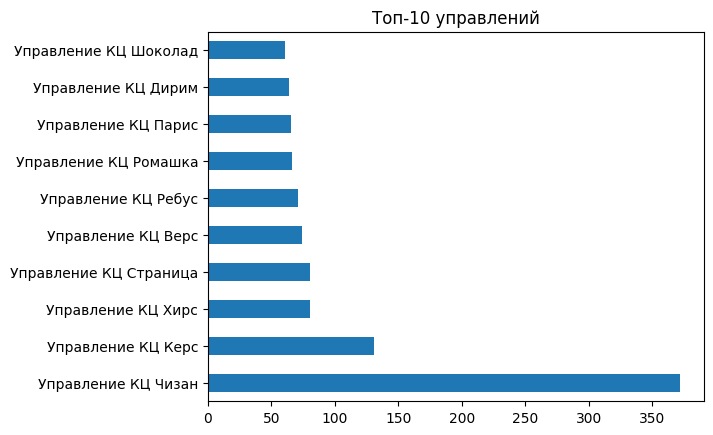

In [ ]:
df_2['management_nm'].value_counts().head(10).plot(kind='barh', title='Топ-10 управлений')

У нас есть 7 звонков, в ходе которых мы не получили утвердительного ответа, но клиенты стали пользоваться продуктом. И это у нас один сотрудник с КЦ Ребус с логином: povaessh

In [ ]:
df_2['hit_status_result_desc'].value_counts(dropna=False)

Дозвон, Успешно        1527
Дозвон, Перезвонить       4
Дозвон, Отказ             3
Name: hit_status_result_desc, dtype: int64

In [ ]:
df_2[df_2['hit_status_result_desc'] !='Дозвон, Успешно'][['management_nm', 'agent_login']]

,management_nm,agent_login
49257,Управление КЦ Ребус,povaessh
56197,Управление КЦ Ребус,povaessh
57281,Управление КЦ Ребус,povaessh
68031,Управление КЦ Ребус,povaessh
69055,Управление КЦ Ребус,povaessh
71877,Управление КЦ Ребус,povaessh
76977,Управление КЦ Ребус,povaessh


Интересно посмотреть на звонки, которые длятся более 1 часа. Здесь у нас всего один оператор 0212legr, и с КЦ Чизан, а как мы помним данное управление является лидером по утилизации. Но вот странность 12 из 13 значений с поля using_flg имеют пропуски, и в данном случае мы не можем корректно оценить работу данного оператора. Если отталкиваться от расшифровки коммуникации, то здесь видно, что только один звонок имеет статус "Дозвон, Успешно". Поэтому стоить обратить внимае на работу данного оператора и послушать о чем он так долго разговаривает с клиентом, если это не приносит положительного результата.

In [ ]:
df[df['duratoin_sec']>=3600][['management_nm', 'agent_login', 'using_flg', 'hit_status_result_desc']]

,management_nm,agent_login,using_flg,hit_status_result_desc
448,Управление КЦ Чизан,0212legr,1.0,"Дозвон, Успешно"
7693,Управление КЦ Чизан,0212legr,NaN,"Дозвон, Отказ"
17911,Управление КЦ Чизан,0212legr,NaN,"Дозвон, Перезвонить"
29248,Управление КЦ Чизан,0212legr,NaN,"Дозвон, Отказ"
39427,Управление КЦ Чизан,0212legr,NaN,"Дозвон, Отказ"
39854,Управление КЦ Чизан,0212legr,NaN,"Дозвон, Отказ"
44265,Управление КЦ Чизан,0212legr,NaN,"Дозвон, Отложить"
48490,Управление КЦ Чизан,0212legr,NaN,"Дозвон, Перезвонить"
69710,Управление КЦ Чизан,0212legr,NaN,"Дозвон, Отказ"
69902,Управление КЦ Чизан,0212legr,NaN,"Дозвон, Перезвонить"


Перейдем к зведной дискриминации)))

Посмотрим есть ли связь между знаком зодиака и качестом работы оператора.

In [ ]:
df['horoscope'].value_counts(normalize=True)*100

Дева        39.271537
Рак          8.260255
Близнецы     8.179514
Весы         7.816180
Телец        7.203894
Водолей      6.877565
Овен         5.933344
Рыбы         5.673178
Стрелец      3.756700
Козерог      3.652410
Скорпион     1.897414
Лев          1.478009
Name: horoscope, dtype: float64

Исходя из визуализации данных, абсолютно точный вывод относительно качества работы и знака зодиака, сделать нельзя, потому что, например, Девы в этой выборке занимают 40%, а Скорпионы всего 2%. Поэтому оценивая какие-либо группы, в выборках они должны быть представлены равными долями или примерно равными, но без большого перевеса в любую сторону.

<Axes: title={'center': 'Распределение расшифровок коммуникаций в зависимости от знака зодиака'}, ylabel='horoscope'>

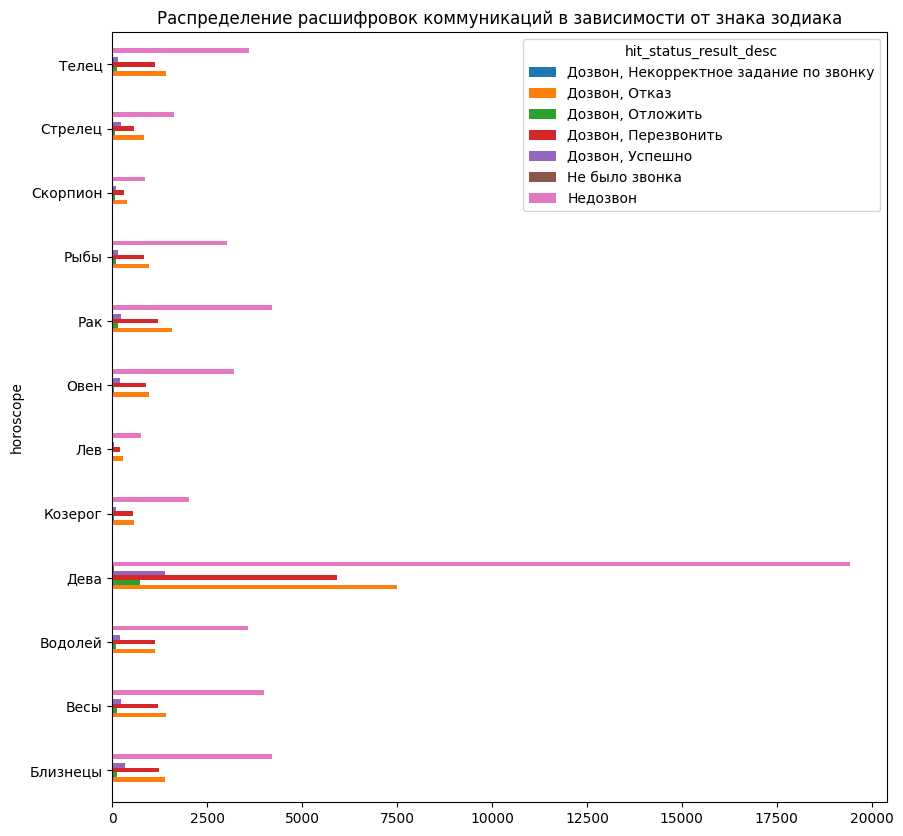

In [ ]:
df.groupby('horoscope')['hit_status_result_desc'].value_counts().unstack().plot.barh(figsize=(10,10),
                      title='Распределение расшифровок коммуникаций в зависимости от знака зодиака')

Произведем анализ управлений. Из данных видно, что 24% всех показателей взяты из управления КЦ Чизан, следом за ним идет КЦ Верс, но там всего 7% всех наблюдений.

In [ ]:
df['management_nm'].value_counts(normalize=True).head(10)*100


Управление КЦ Чизан       23.976720
Управление КЦ Верс         7.339583
Управление КЦ Дирим        6.952699
Управление КЦ Ромашка      6.634221
Управление КЦ Страница     5.839146
Управление КЦ Парис        4.878103
Управление КЦ Кас          4.785027
Управление КЦ Неп          3.206091
Управление КЦ Мазан        3.044609
Управление КЦ Тазан        2.898827
Name: management_nm, dtype: float64

In [ ]:
"""
создадим список топ-10 управлений по общему количеству звонков/заданий
"""
leader_list = df['management_nm'].value_counts().head(10).index
leader_list

Index(['Управление КЦ Чизан', 'Управление КЦ Верс', 'Управление КЦ Дирим',
       'Управление КЦ Ромашка', 'Управление КЦ Страница',
       'Управление КЦ Парис', 'Управление КЦ Кас', 'Управление КЦ Неп',
       'Управление КЦ Мазан', 'Управление КЦ Тазан'],
      dtype='object')

In [ ]:
df_leader = df[df['management_nm'].apply(lambda x:x in leader_list)]
df_leader.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62025 entries, 0 to 89173
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wo_hit_rk               62025 non-null  object 
 1   wo_task_rk              62025 non-null  object 
 2   wo_queue_id             62025 non-null  object 
 3   agent_login             62025 non-null  object 
 4   wo_employee_rk          62025 non-null  object 
 5   finish_dttm             62025 non-null  object 
 6   duratoin_sec            62025 non-null  float64
 7   horoscope               62025 non-null  object 
 8   org_group_rk            62025 non-null  object 
 9   org_management_rk       62025 non-null  object 
 10  group_nm                62025 non-null  object 
 11  management_nm           62025 non-null  object 
 12  queue_id                62023 non-null  object 
 13  queue_desc              62023 non-null  object 
 14  hit_status_result_id    62025 non-null

Если анализировать визуальные данные, представленные ниже, то картина во всех КЦ из топ-10 примерно одинаковая: больше всего статусов "Недозвон", потом идет "Дозвон, Отказ" и "Дозвон, Перезвонить". КЦ Чизан выделяется на фоне других КЦ тем, что 20% данных в датафрейме представлены именно им, остальных в несколько раз меньше (минимум в 3).

<Axes: title={'center': 'Распределение расшифровок коммуникаций в зависимости от знака зодиака'}, ylabel='management_nm'>

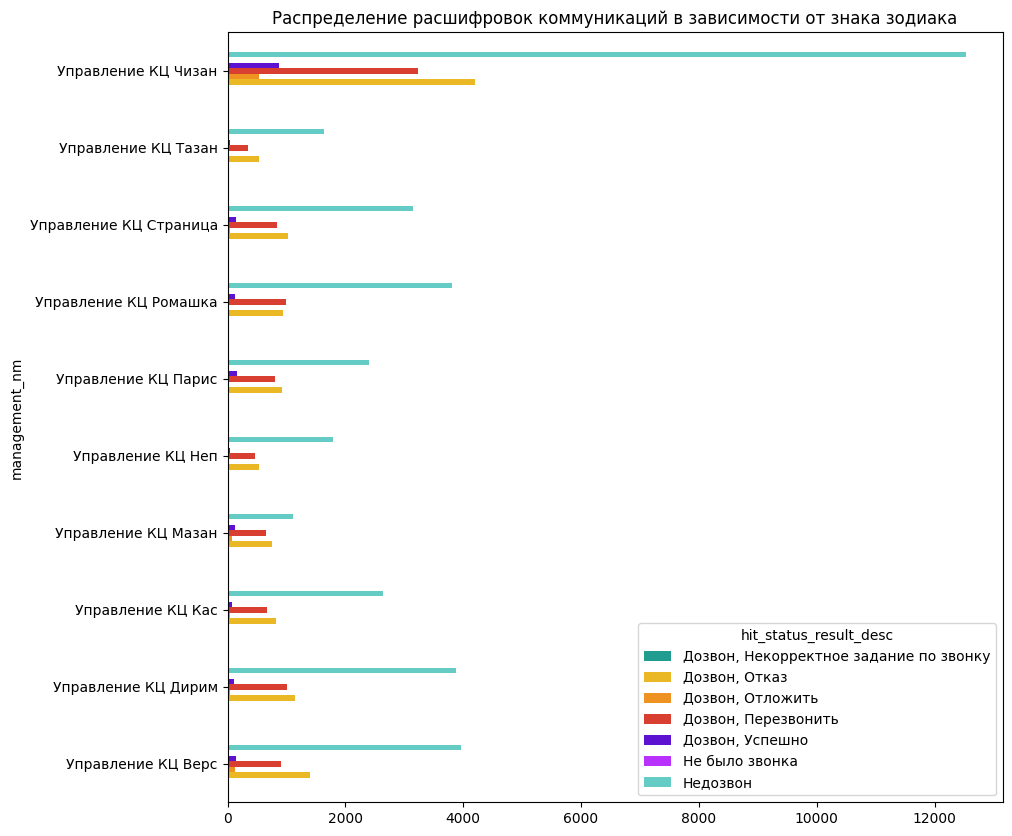

In [ ]:
df_leader.groupby('management_nm')['hit_status_result_desc'].value_counts().unstack().plot.barh(figsize=(10,10),
                     title='Распределение расшифровок коммуникаций по топ-10 управлений',
                     color = ['#219C90', '#E9B824', '#EE9322', '#D83F31', '#5D12D2', '#B931FC', '#64CCC5'])

Уважаемый проверяющий, прошу вас так же обратить внимания, что я закончил курс от Тинькофф Образования "Анализ данных в индустрии" (https://github.com/letun1987/Certificates/blob/b4bafce4efb0fa32ed385fa9324f8f1db9054fa3/Diploma.pdf). В лидерборде данного курса я занял 41 место из более чем 3000 участников. Надеюсь мне это когда-нибудь зачтется))))

При помощи встроенных методов Google Colab можно скачать наш датафрейм на компьютер в CSV-формате.

In [ ]:
from google.colab import files

In [ ]:
df.to_csv('test_task.csv', index=False, sep='\t')
files.download('test_task.csv')